In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("bank-full.csv")
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [4]:
dataset_pos = dataset[(dataset["Target"]=="yes")]
dataset_neg = dataset[(dataset["Target"]=="no")]

In [5]:
dataset_pos.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
dataset.count()


age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
Target       45211
dtype: int64

In [7]:
dataset_pos.count()

age          5289
job          5289
marital      5289
education    5289
default      5289
balance      5289
housing      5289
loan         5289
contact      5289
day          5289
month        5289
duration     5289
campaign     5289
pdays        5289
previous     5289
poutcome     5289
Target       5289
dtype: int64

In [8]:
dataset_neg.count()

age          39922
job          39922
marital      39922
education    39922
default      39922
balance      39922
housing      39922
loan         39922
contact      39922
day          39922
month        39922
duration     39922
campaign     39922
pdays        39922
previous     39922
poutcome     39922
Target       39922
dtype: int64

### Data Distribution

**Total number of records = 45211**

**Total number of users who subscribed Term Deposit = 5289 (11.7%)**

**Total number of users who did not subscribe Term Deposit = 39922 (88.3%)**

## Age

Age is distributed between 18 and 95 with a Right SKEW in the distribution


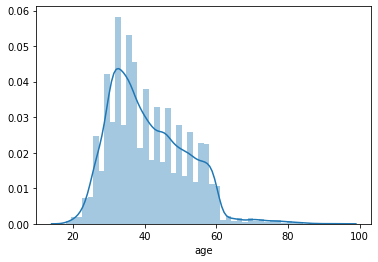

In [9]:
sns.distplot(dataset["age"])

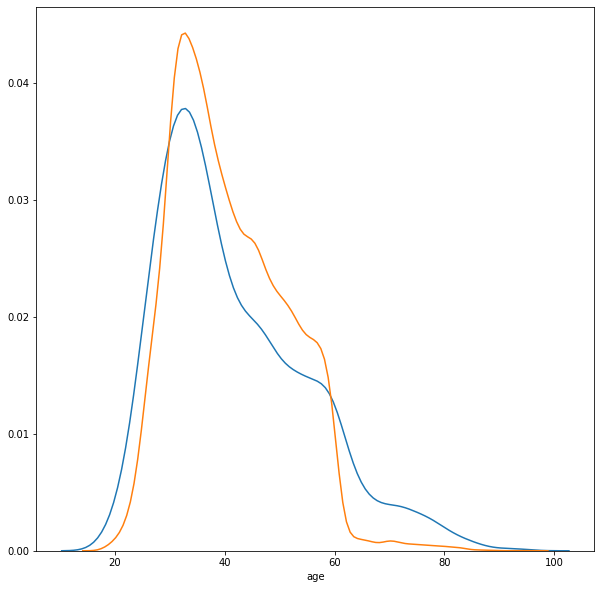

In [10]:
plt.subplots(figsize=(10,10))
sns.distplot(dataset_pos["age"],hist=False)
sns.distplot(dataset_neg["age"],hist=False)

**The above graph shows Target column is independent of Age. We need to confirm this after checking the correlation**

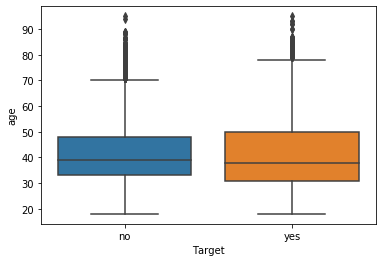

In [11]:
sns.boxplot(y = dataset["age"], x=dataset["Target"])

**Outliers exists for positive and negetive class**


## Balance

**Balance data ranges from -8019.0 and max 102127.0**

**There is a huge right SKEW in the distribution**

**Negetive values for data exists in the dataset. So this has to be reviewed**

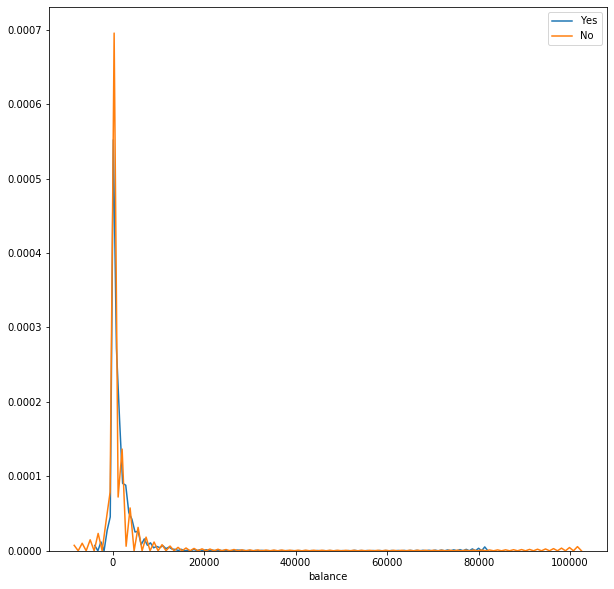

In [12]:
plt.subplots(figsize=(10,10))
sns.distplot(dataset_pos["balance"],hist=False,label="Yes")
sns.distplot(dataset_neg["balance"],hist=False,label="No")

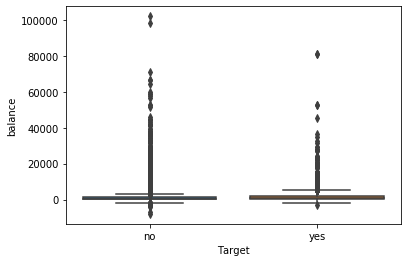

In [13]:
sns.boxplot(y = dataset["balance"], x=dataset["Target"])

**From the above plots, We cannot differentiate positive and negetive classes. Not seeing any correlation with Target class**

In [14]:
dataset_neg_balance = dataset[(dataset["balance"]<0)]
dataset_neg_balance.count()

age          3766
job          3766
marital      3766
education    3766
default      3766
balance      3766
housing      3766
loan         3766
contact      3766
day          3766
month        3766
duration     3766
campaign     3766
pdays        3766
previous     3766
poutcome     3766
Target       3766
dtype: int64

In [15]:
dataset_neg_balance_yes = dataset[(dataset["balance"]<0) & (dataset["Target"] == "yes")]
dataset_neg_balance_yes.count()

age          210
job          210
marital      210
education    210
default      210
balance      210
housing      210
loan         210
contact      210
day          210
month        210
duration     210
campaign     210
pdays        210
previous     210
poutcome     210
Target       210
dtype: int64

**95% of the users who have subscribed term deposit have positive balance**

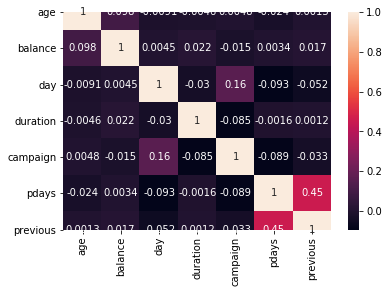

In [16]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

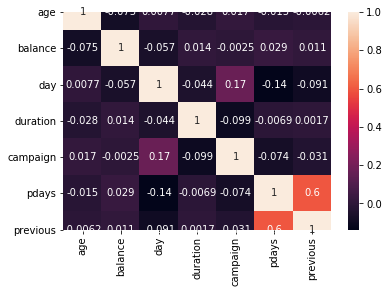

In [17]:
sns.heatmap(dataset_neg_balance.corr(), annot = True)
plt.show()

**There is no significant pattern found within those customers who have negetive balance**

## Day - Day of Month

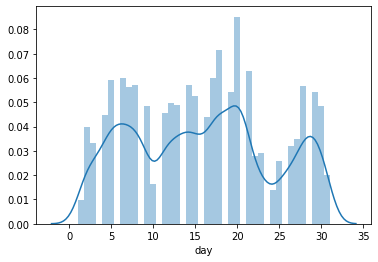

In [18]:
sns.distplot(dataset["day"])

In [19]:
#dataset_pos = dataset[(dataset["Target"]=="yes")]
#dataset_neg = dataset[(dataset["Target"]=="no")]

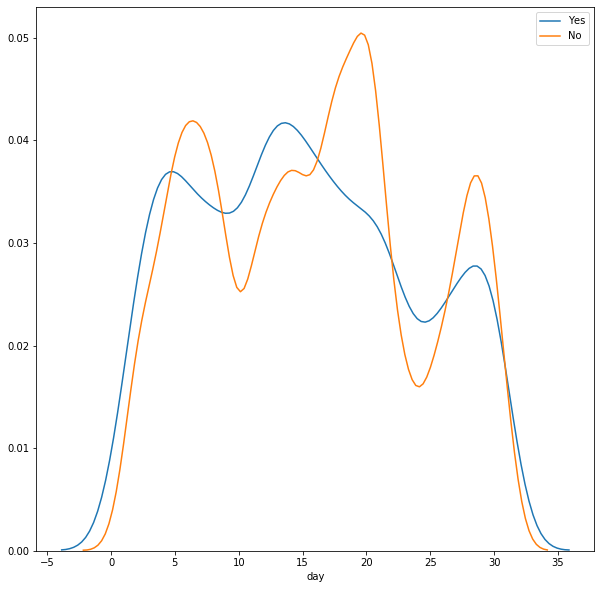

In [20]:
plt.subplots(figsize=(10,10))
sns.distplot(dataset_pos["day"],hist=False,label="Yes")
sns.distplot(dataset_neg["day"],hist=False,label="No")

**The above graph shows that between 10th and 15th day of month, there is max possibility of customer subscribing term deposit**

## Duration

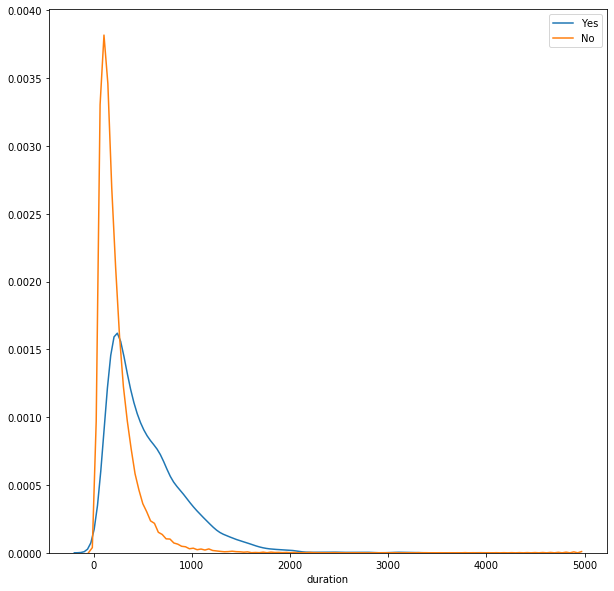

In [21]:
plt.subplots(figsize=(10,10))
sns.distplot(dataset_pos["duration"],hist=False,label="Yes")
sns.distplot(dataset_neg["duration"],hist=False,label="No")

**From the graph it's clear that duration for positive class is comparatively higher than negetive class. Tha means the call lasts long for those user's who showed interest in Term Deposit**

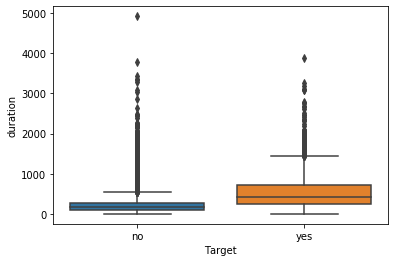

In [22]:
sns.boxplot(y = dataset["duration"], x=dataset["Target"])

**Data distribution says, call duration for positive class is longer than negetive class**

## Campaign

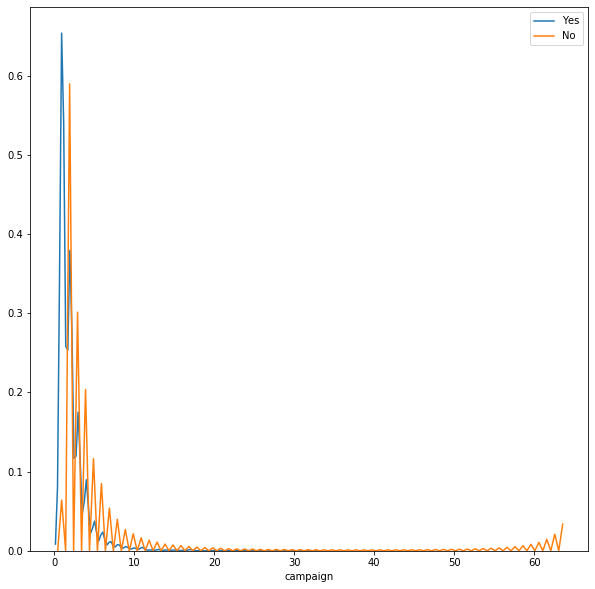

In [23]:
plt.subplots(figsize=(10,10))
sns.distplot(dataset_pos["campaign"],hist=False,label="Yes")
sns.distplot(dataset_neg["campaign"],hist=False,label="No")

In [24]:
dataset_pos["campaign"].value_counts()

1     2561
2     1401
3      618
4      317
5      139
6       92
7       47
8       32
9       21
11      16
10      14
13       6
17       6
12       4
14       4
15       4
16       2
21       1
29       1
32       1
24       1
20       1
Name: campaign, dtype: int64

In [25]:
dataset_neg["campaign"].value_counts()

1     14983
2     11104
3      4903
4      3205
5      1625
6      1199
7       688
8       508
9       306
10      252
11      185
12      151
13      127
14       89
15       80
16       77
17       63
18       51
19       44
20       42
21       34
22       23
23       22
25       22
24       19
28       16
29       15
26       13
31       12
27       10
32        8
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

**Out of 5289 users who subscribed Term deposite, 75% of users were contacted only once or twice**

**We can also see that, 65% of the users who did not show interest during first two contacts, did not subscribe the term deposit at all**

**From these observations, we can infer the fact that whether the user is going to subscribe the term deposit or not**

### Relationship between Campaign and Duration

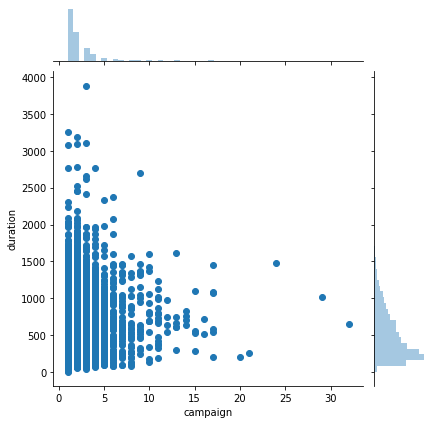

In [26]:
sns.jointplot(x=dataset_pos["campaign"],y=dataset_pos["duration"])

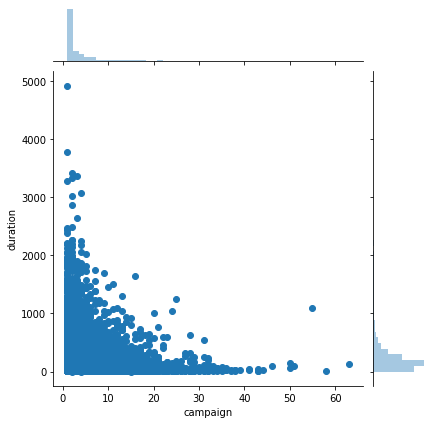

In [27]:
sns.jointplot(x=dataset_neg["campaign"],y=dataset_neg["duration"])

**For both positive and negetive class, the first call has long duration**

## pdays

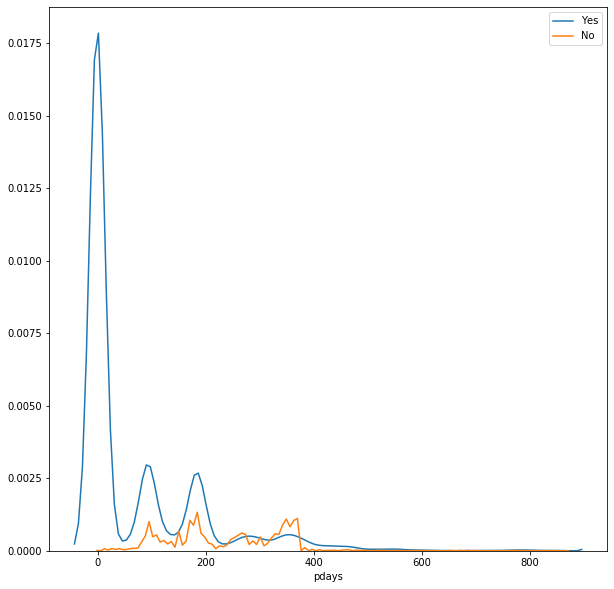

In [28]:
plt.subplots(figsize=(10,10))
sns.distplot(dataset_pos["pdays"],hist=False,label="Yes")
sns.distplot(dataset_neg["pdays"],hist=False,label="No")

In [29]:
dataset_pos["pdays"].value_counts()

-1      3384
 92       96
 182      80
 91       75
 181      74
 183      64
 184      46
 94       35
 93       34
 95       32
 90       31
 87       28
 98       25
 97       24
 185      23
 96       21
 187      19
 99       19
 180      17
 88       17
 186      16
 188      15
 179      15
 189      14
 195      14
 178      13
 104      13
 105      13
 89       13
 196      12
        ... 
 69        1
 65        1
 421       1
 425       1
 437       1
 445       1
 234       1
 230       1
 222       1
 206       1
 158       1
 142       1
 62        1
 58        1
 34        1
 22        1
 14        1
 6         1
 603       1
 769       1
 761       1
 749       1
 553       1
 541       1
 529       1
 481       1
 477       1
 469       1
 449       1
 4         1
Name: pdays, Length: 423, dtype: int64

In [30]:
dataset_neg["pdays"].value_counts()

-1      33570
 370       90
 182       87
 364       73
 350       68
 175       63
 183       62
 343       60
 349       55
 92        51
 363       51
 91        51
 174       50
 188       49
 365       48
 189       46
 351       46
 368       45
 357       45
 185       45
 367       45
 186       44
 181       43
 172       43
 345       43
 347       42
 342       42
 356       42
 95        42
 344       40
        ...  
 775        1
 838        1
 774        1
 518        1
 486        1
 454        1
 491        1
 460        1
 434        1
 492        1
 18         1
 465        1
 401        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 399        1
 543        1
 47         1
 686        1
 526        1
 717        1
 589        1
 493        1
 397        1
 45         1
 32         1
Name: pdays, Length: 491, dtype: int64

**Most of the users in the datasets were not contacted before.**



In [56]:
dataset["NoOfDaysSinceLastContactIn100s"] = dataset.apply(lambda x: x["pdays"]//100,axis=1)

In [57]:
dataset[(dataset["Target"] =="no")]["NoOfYearsSinceLastContact"].value_counts()

-1    33570
 1     2129
 3     2032
 2     1277
 0      795
 4       56
 5       30
 7       14
 6       13
 8        6
Name: NoOfYearsSinceLastContact, dtype: int64

In [58]:
dataset[(dataset["Target"] =="yes")]["NoOfDaysSinceLastContactIn100s"].value_counts()

-1    3384
 1     750
 0     612
 3     231
 2     197
 4      71
 5      25
 7       8
 6       6
 8       5
Name: NoOfDaysSinceLastContactIn100s, dtype: int64

**People wh subscribed Term Deposit**

**Out of 1905 previously contacted users, 32% users were last contacted in last 100 days and 71.5 users were contacted in last 200 days**

### Relationship between "NoOfYearsSinceLastContact","campaign","duration"

In [59]:
dataset_pos = dataset[(dataset["Target"]=="yes")]
dataset_neg = dataset[(dataset["Target"]=="no")]

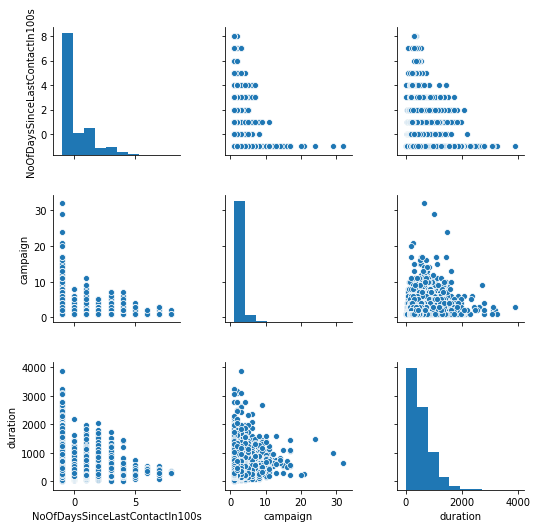

In [60]:
sns.pairplot(dataset_pos[["NoOfDaysSinceLastContactIn100s","campaign","duration"]])

**Positive class - From the above pair plot, people who were contacted in between 0 and 300 days from now responded positively for the term deposit and the call lasted longer even if the number of contacts during the campaign were comparatively lesser**

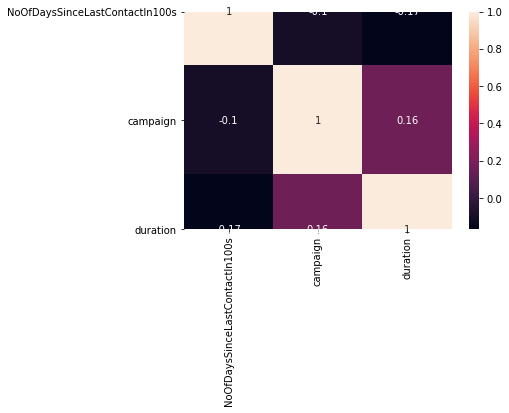

In [61]:
sns.heatmap(dataset_pos[["NoOfDaysSinceLastContactIn100s","campaign","duration"]].corr(), annot = True)
plt.show()

### Previous

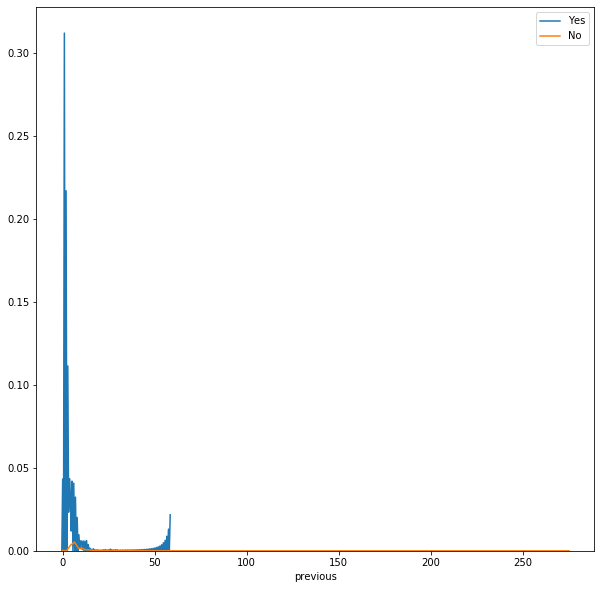

In [62]:
plt.subplots(figsize=(10,10))
sns.distplot(dataset_pos["previous"],hist=False,label="Yes")
sns.distplot(dataset_neg["previous"],hist=False,label="No")

In [63]:
dataset_pos["previous"].value_counts()

0     3384
1      583
2      456
3      294
4      171
5      121
6       83
7       54
8       39
10      26
9       24
11      15
12      10
13       9
14       5
17       3
19       2
20       1
15       1
58       1
30       1
21       1
29       1
23       1
22       1
26       1
55       1
Name: previous, dtype: int64

In [64]:
dataset_neg["previous"].value_counts()

0      33570
1       2189
2       1650
3        848
4        543
5        338
6        194
7        151
8         90
9         68
11        50
10        41
12        34
13        29
15        19
14        14
16        13
17        12
19         9
23         7
20         7
18         6
27         5
24         5
22         5
25         4
21         3
29         3
38         2
37         2
28         2
30         2
40         1
41         1
275        1
51         1
35         1
26         1
32         1
Name: previous, dtype: int64

## Categorical fields

In [65]:
dataset_pos["job"].value_counts()

management       1301
technician        840
blue-collar       708
admin.            631
retired           516
services          369
student           269
unemployed        202
self-employed     187
entrepreneur      123
housemaid         109
unknown            34
Name: job, dtype: int64

In [66]:
dataset_neg["job"].value_counts()

blue-collar      9024
management       8157
technician       6757
admin.           4540
services         3785
retired          1748
self-employed    1392
entrepreneur     1364
housemaid        1131
unemployed       1101
student           669
unknown           254
Name: job, dtype: int64

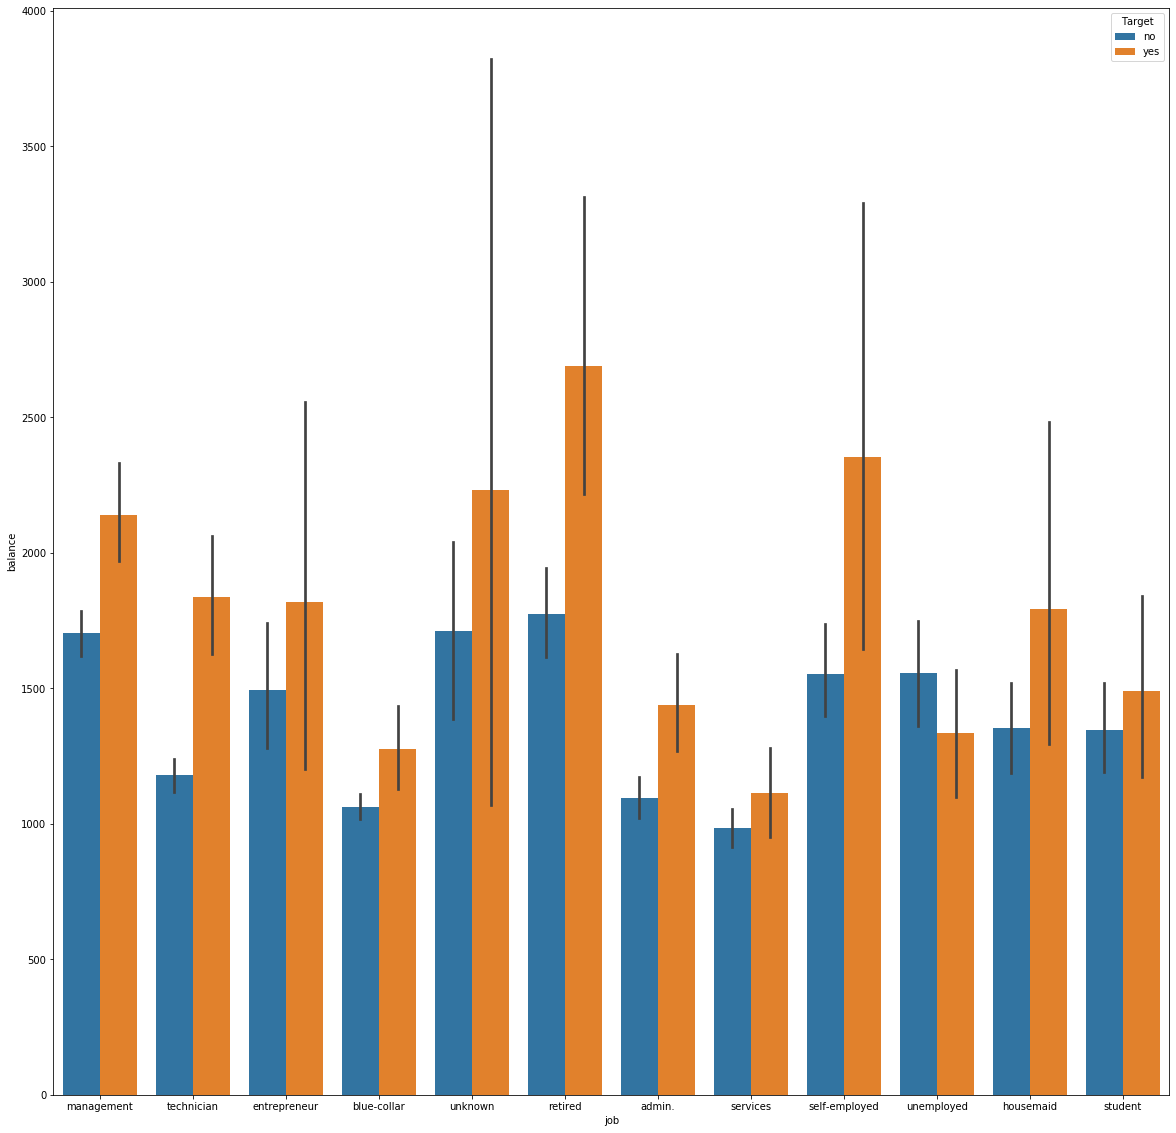

In [67]:
plt.subplots(figsize=(20,20))
sns.barplot(dataset["job"],dataset["balance"],hue=dataset["Target"])

**In all the job classes, customers who subscribed to term deposit has higher balance than people who did not.**
**Customers having job status such as "Retired" and "Self Employed" are having high marginal difference of balance between Positive and Negetive classes**

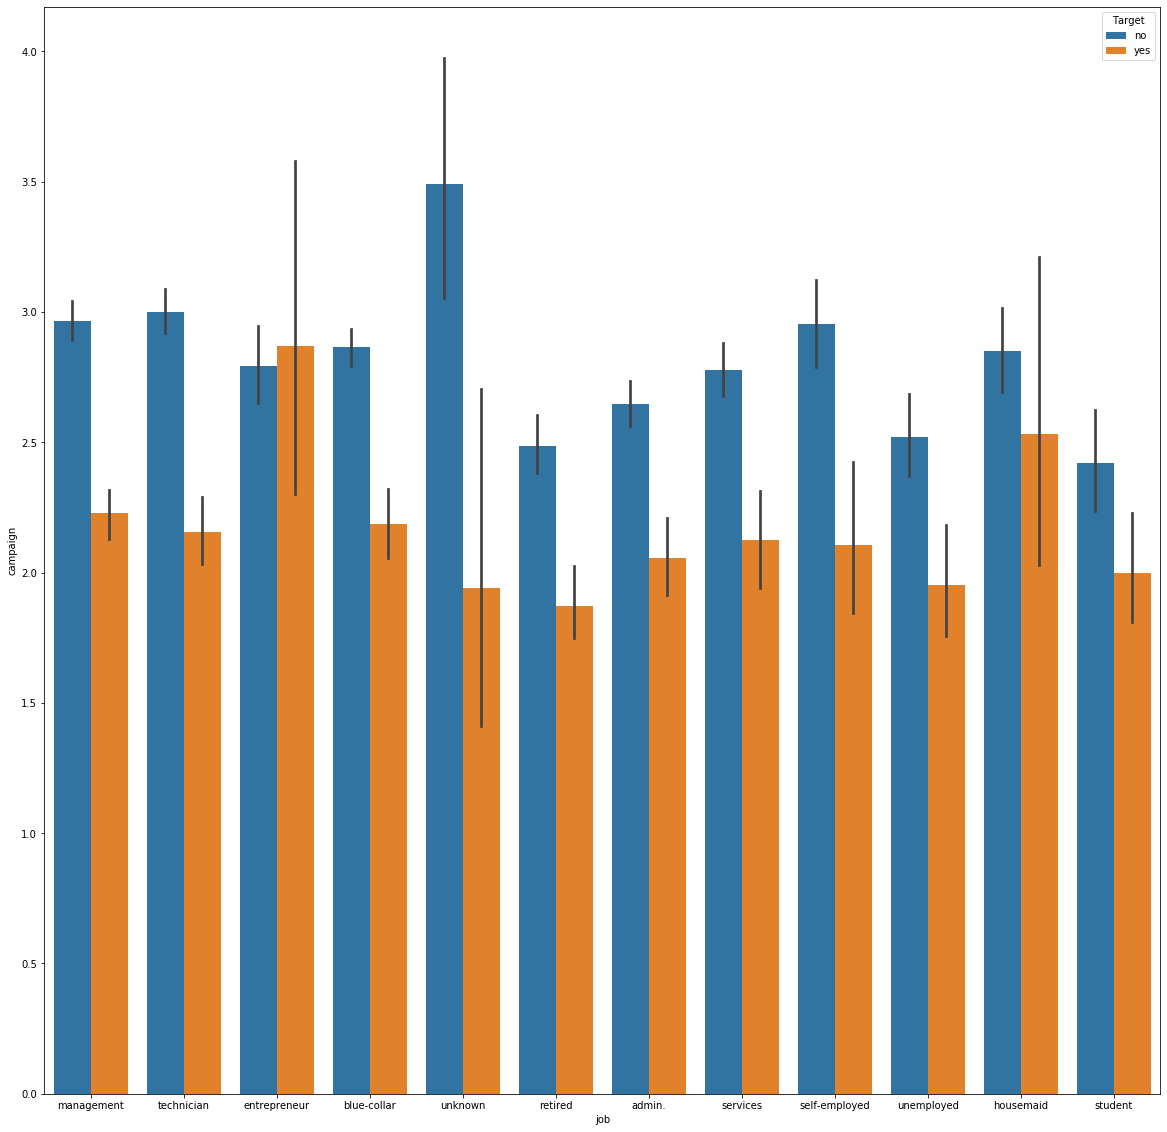

In [68]:
plt.subplots(figsize=(20,20))
sns.barplot(dataset["job"],dataset["campaign"],hue=dataset["Target"])

**In the case of Entrepreneurs, they got average of 3 contacts in this campaign and most of them responded positively than rejecting the term deposit offer**

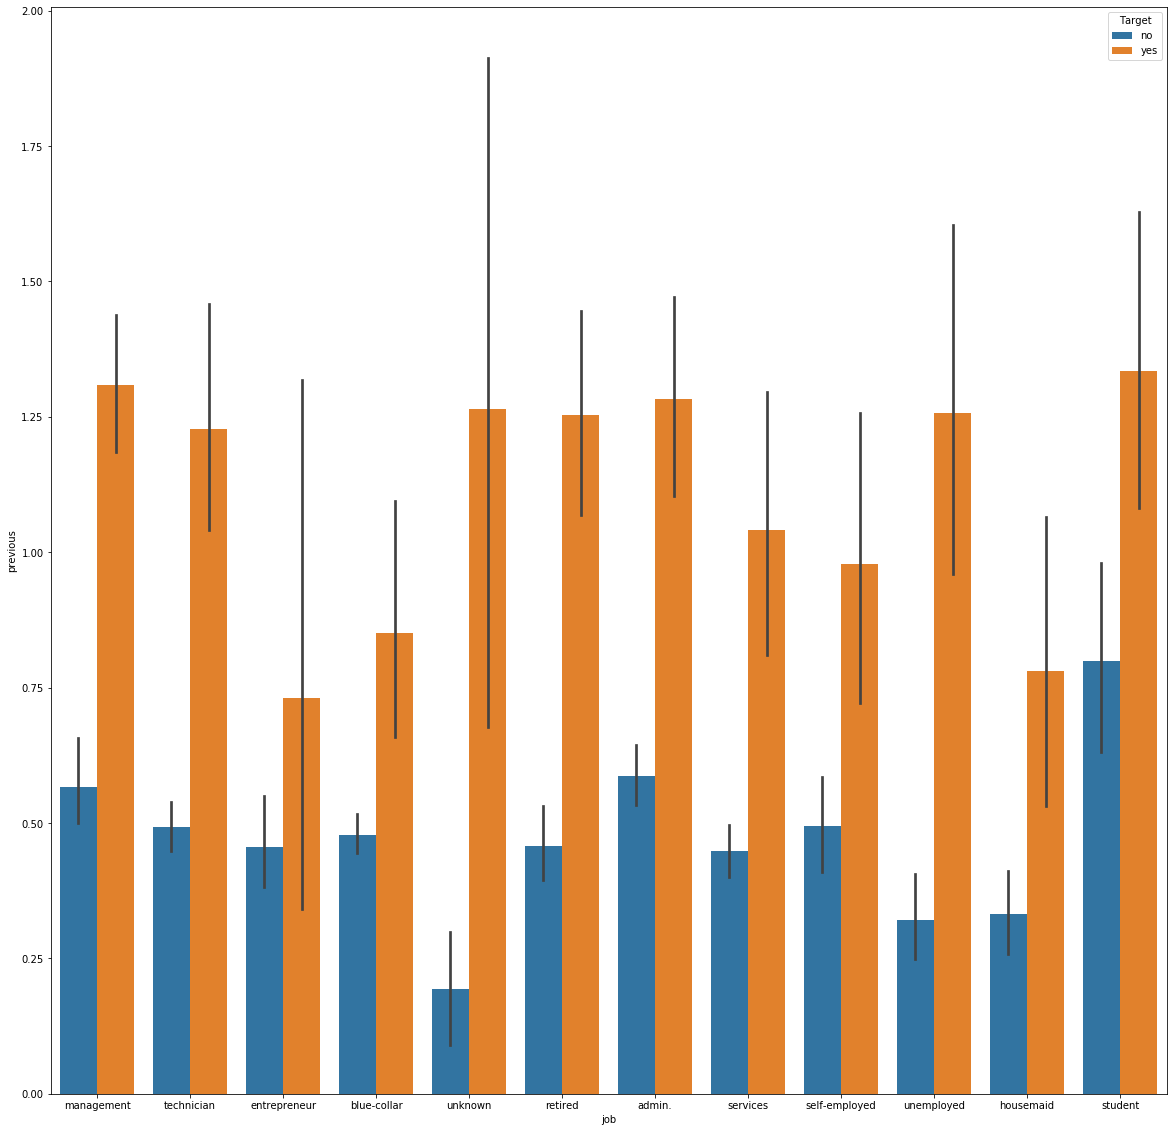

In [69]:
plt.subplots(figsize=(20,20))
sns.barplot(dataset["job"],dataset["previous"],hue=dataset["Target"])

**From the above plot, it's clear that customers, who subscribed Term Deposit, from all classes were contacted previousily before this campaign**

In [70]:
dataset_pos["marital"].value_counts()

married     2755
single      1912
divorced     622
Name: marital, dtype: int64

In [72]:
dataset_neg["marital"].value_counts()

married     24459
single      10878
divorced     4585
Name: marital, dtype: int64

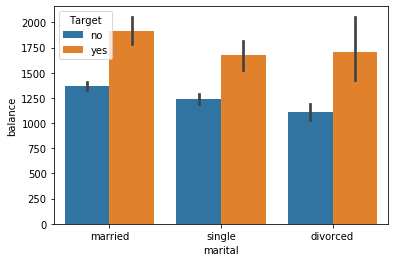

In [76]:
sns.barplot(dataset["marital"],dataset["balance"],hue=dataset["Target"])

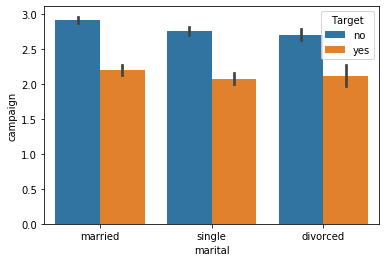

In [77]:
sns.barplot(dataset["marital"],dataset["campaign"],hue=dataset["Target"])

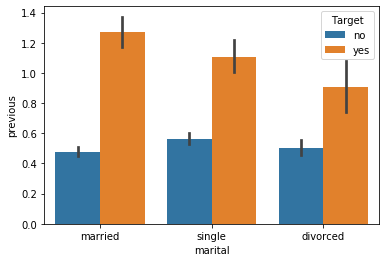

In [78]:
sns.barplot(dataset["marital"],dataset["previous"],hue=dataset["Target"])

In [79]:
dataset_pos["education"].value_counts()

secondary    2450
tertiary     1996
primary       591
unknown       252
Name: education, dtype: int64

In [80]:
dataset_neg["education"].value_counts()

secondary    20752
tertiary     11305
primary       6260
unknown       1605
Name: education, dtype: int64

In [81]:
dataset_pos["default"].value_counts()

no     5237
yes      52
Name: default, dtype: int64

**only 1% of users who are defaulters have subscribed for term deposit**

In [83]:
dataset_neg["default"].value_counts()

no     39159
yes      763
Name: default, dtype: int64

In [84]:
dataset_pos["housing"].value_counts()

no     3354
yes    1935
Name: housing, dtype: int64

In [86]:
dataset_neg["housing"].value_counts()

yes    23195
no     16727
Name: housing, dtype: int64

**Most of the people who has housing loan rejected the term deposit offer**

In [88]:
dataset_pos["loan"].value_counts()

no     4805
yes     484
Name: loan, dtype: int64

In [89]:
dataset_neg["loan"].value_counts()

no     33162
yes     6760
Name: loan, dtype: int64

In [90]:
dataset_pos["contact"].value_counts()

cellular     4369
unknown       530
telephone     390
Name: contact, dtype: int64

In [91]:
dataset_neg["contact"].value_counts()

cellular     24916
unknown      12490
telephone     2516
Name: contact, dtype: int64

**82% of the users who subscribed personal loan were contacted to their cell phone**

In [92]:
dataset_pos["month"].value_counts()

may    925
aug    688
jul    627
apr    577
jun    546
feb    441
nov    403
oct    323
sep    269
mar    248
jan    142
dec    100
Name: month, dtype: int64

In [93]:
dataset_neg["month"].value_counts()

may    12841
jul     6268
aug     5559
jun     4795
nov     3567
apr     2355
feb     2208
jan     1261
oct      415
sep      310
mar      229
dec      114
Name: month, dtype: int64

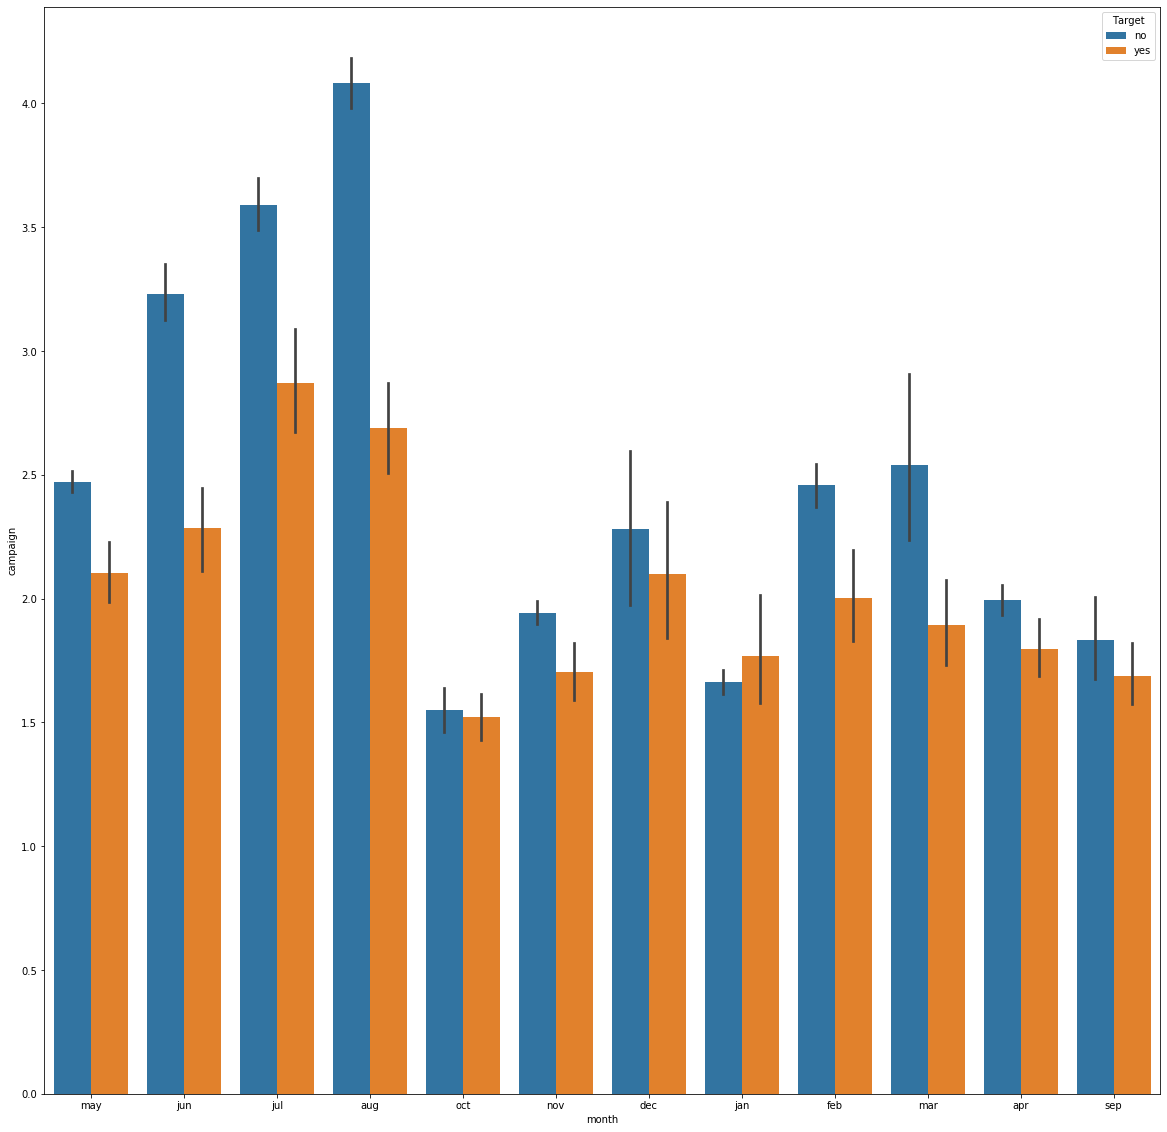

In [95]:
plt.subplots(figsize=(20,20))
sns.barplot(dataset["month"],dataset["campaign"],hue=dataset["Target"])

In [97]:
dataset_pos["poutcome"].value_counts()

unknown    3386
success     978
failure     618
other       307
Name: poutcome, dtype: int64

In [98]:
dataset_neg["poutcome"].value_counts()

unknown    33573
failure     4283
other       1533
success      533
Name: poutcome, dtype: int64

**In most of the cases, by end of the call, the outcome will be unknown**

# Training and Performance Evaluation

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# module for splitting the entire dataset into training and testing dataset
from sklearn.model_selection import train_test_split

#import LogisticReGression Model
from sklearn.linear_model import LogisticRegression

#import NaiveBayes model
from sklearn.naive_bayes import GaussianNB

#import KNN model
from sklearn.neighbors import KNeighborsClassifier

#import SVM model
from sklearn.svm import SVC

#Import metrics modulel to calculate model performance
from sklearn import metrics

#import resample module for upsampling
from sklearn.utils import resample

# module for evaluating the feature dependecies with target variable
import statsmodels.formula.api as sm

# module for cross validation
from sklearn.model_selection import cross_val_score 

# module for AUC-ROC Calculation
from sklearn.metrics import roc_curve, auc

# module for SVM hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# module for ensembled models
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier,GradientBoostingClassifier

# module for decision tree
from sklearn.tree import DecisionTreeClassifier

# 
from xgboost import XGBClassifier

from catboost import CatBoostClassifier

import lightgbm as lgb

import random

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

class tuning_params:
    def __init__(self):
        self.random_forest = None
        self.adaboost = None
        self.svm = None


hyperparams = tuning_params()

def drop_columns(df, col_names,inplace=False):
    print("--------Dropping columns-----")
    return df.drop(col_names,inplace = inplace, axis=1)


def transform_data(df):
    
    # Create a new column CCUsage from CCAvg column
    df["CCUsage"] = df.apply(lambda x: 1 if x.CCAvg < 3 else 2 if (x.CCAvg >= 3 and x.CCAvg <6) else 3 if (x.CCAvg >= 6 and x.CCAvg <8) else 4, axis=1)
    
    # Create a new column IncomeStatus from Income
    df["IncomeStatus"] =df.apply(lambda x: 1 if x.Income <110 else 2 if x.Income>=110 and x.Income <180 else 3,axis=1)
    
    # Create a new column HasMortage from Mortage
    df["HasMortgage"] = df.apply(lambda x: 0 if x.Mortgage == 0 else 1,axis=1)
    
    # Scale the Age Column as a new column
    df["Age_Scaled"] = df.apply(lambda x: (x.Age - df["Age"].mean())/df["Age"].std(),axis=1)
    
    # New column after scaling experience column
    df["Experience_Scaled"] = df.apply(lambda x: (x.Age - df["Experience"].mean())/df["Experience"].std(),axis=1)
    
    return df

    
    
def get_features_and_target(df,target_column_name):
    X=df.drop([target_column_name],axis=1)
    y=df[target_column_name]    
    return X,y

def get_onehot_encoded_features(X):
    categoryList = list(X.select_dtypes(include=['object']).columns)
    dummies = pd.get_dummies(X[categoryList], prefix= categoryList)
    X.drop(categoryList, axis=1, inplace = True)
    X=pd.concat([X,dummies], axis =1)
    return X


def upsample_data(df,target_column_name, minority_class, majority_class, number_of_samples):
    majority=df[df[target_column_name] == majority_class]
    minority=df[df[target_column_name] == minority_class]
    minority_upsampled = resample(minority,replace=True,n_samples = number_of_samples)
    upsampled=pd.concat([minority_upsampled,majority])
    return upsampled    


def train_model(algorithm_name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)     
    
    print("#############Evaluating the Performance of ",algorithm_name,"#############")    
    
    evaluate_performance(model, X_train,y_train, X_test, y_test)
    
    print("#############Evaluation Completed for ",algorithm_name," ###################")
    
def evaluate_performance(model, X_train, y_train, X_test, y_test):   
    
    y_predict = model.predict(X_test) 
    
    print("\n")
    print("Confusion Metrics:")
    print(metrics.confusion_matrix(y_test, y_predict))
    
    print("\n")
    print("Model Performance Summary:")
    print(metrics.classification_report(y_test, y_predict))
    
    print("Evaluating the Cross Validation score")
    
    #print(X_train.shape)
    #print(y_train.shape)
    
    accuracies= cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5) 
    accuracies_mean=accuracies.mean()*100
    print("Mean Accuracy:",accuracies_mean)

    accuracies_std=accuracies.std()*100
    print("Standard Deviation:",accuracies_std)
    
    plot_auc_roc_curve(y_test, y_predict)
    
def plot_auc_roc_curve(y_test,y_pred):
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def evaluate_bestK(X_train,y_train, X_test, y_test):
    error_rate = []

    for i in range(1,50):
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,50), error_rate,color = "green", linestyle="dashed", marker = "o", markerfacecolor='red',markersize=10)
    plt.title("Error Rate vs K")
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    
    plt.show()
    
    return error_rate.index(min(error_rate)) + 1

def random_forest_hyperparams():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)]

    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 20, num = 5)] ## change 10,20 and 2
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10,15]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4,10]

    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    return n_estimators, max_features,max_depth, min_samples_split, min_samples_leaf, bootstrap

def adaboost_hyperparams():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 5)] ## play with start and stop

    learning_rate = [1,0.1,0.01,0.001,0.5,0.05,0.005]

    return n_estimators, learning_rate
    

def get_model_turning_params(modelname):
    
    TUNING_PARAM_VALUES = {
        "random_forest":
            random_forest_hyperparams(),           
        
        "ada_boost":
            adaboost_hyperparams()
    }
        
    return TUNING_PARAM_VALUES.get(modelname)
        
        
def initalize_tuning_params():
    
    tuning_params_svm = {'C': [0.1,1,5,7,8,9,10, 100, 1000], 'gamma': [1,0.1,0.01,0.002,0.0005,0.001,0.0001], 'kernel': ['rbf']}
    
    n_estimators, max_features,max_depth, min_samples_split, min_samples_leaf, bootstrap = get_model_turning_params("random_forest")
    tuning_params_randomforest = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
    
    n_estimators, learning_rate = get_model_turning_params("ada_boost")
    tuning_params_adaboost = {'n_estimators': n_estimators,
               'max_features': max_features,
               'learning_rate': learning_rate}
    
    hyperparams.random_forest = tuning_params_randomforest
    hyperparams.adaboost = tuning_params_adaboost
    hyperparams.svm = tuning_params_svm
    

    
def evaluate_logisticregression_performance(X_train,y_train, X_test, y_test):
    model = LogisticRegression()
    train_model("Logistic Regression", model, X_train, X_test, y_train, y_test)

def evaluate_naivebayes_performance(X_train,y_train, X_test, y_test):
    model = GaussianNB()
    train_model("Naive Bayes", model, X_train, X_test, y_train, y_test)

def evaluate_knn_performance(X_train,y_train, X_test, y_test):    
    optimal_neighbor = evaluate_bestK(X_train, y_train, X_test,  y_test)    
    
    print("Optimal value of K is: ",optimal_neighbor)
    
    model = KNeighborsClassifier(n_neighbors= optimal_neighbor, weights="distance")
    train_model("KNN", model, X_train, X_test, y_train, y_test)
    
def do_hyperparams_tuning_svm(X_train,y_train, X_test, y_test):
    param_grid = {'C': [0.1,1,5,10, 100, 1000], 'gamma': [1,0.1,0.01,0.002,0.0005], 'kernel': ['rbf']}
    model = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
    return model
    
    
def evaluate_svm_performance(X_train,y_train, X_test, y_test):  
    svc_model = SVC()
    train_model("SVM", svc_model, X_train, X_test, y_train, y_test)

def evaluate_adaboost_performance(X_train,y_train, X_test, y_test):
    model = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 3, learning_rate = 0.001)
    train_model("AdaBoost", model, X_train, X_test, y_train, y_test)
    
def evaluate_gradientboost_performance(X_train,y_train, X_test, y_test):
    model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
    train_model("GradientBoost", model, X_train, X_test, y_train, y_test)
    
def evaluate_metabagging_performance(X_train,y_train, X_test, y_test):
    model = BaggingClassifier(DecisionTreeClassifier(random_state=1))
    train_model("MetaBagging", model, X_train, X_test, y_train, y_test)
    
def evaluate_randomforest_performance(X_train,y_train, X_test, y_test):
    classifier = RandomForestClassifier(n_estimators = 10, criterion='entropy')    
    train_model("RandomForest", model, X_train, X_test, y_train, y_test)
    
def do_hyperparms_tuning_rf(X_train,y_train, X_test, y_test):
    model = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = hyperparams.random_forest, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)
    
    model.fit(X_train,y_train)
    return model.best_estimator_

def evaluate_xgboost_performance(X_train,y_train, X_test, y_test):
    model = XGBClassifier()
    train_model("XGBoost", model, X_train, X_test, y_train, y_test)

def evaluate_catboost_performance(X_train,y_train, X_test, y_test):
    model = CatBoostClassifier(iterations=100, depth=3, learning_rate=0.1, loss_function='Logloss')
    train_model("Catboost", model, X_train, X_test, y_train, y_test)

### Load Dataset

In [20]:
#load the dataset and assign to a variable. We should not alter the dataset, rather we have derive the dataset for our model training
dataset = pd.read_csv("bank-full.csv")

dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### Convert Target column values into binaries(0 & 1)

In [22]:
dataset["target"]=dataset.apply(lambda x: 0 if x["Target"] == "no" else 1,axis=1)
dataset.drop("Target",axis=1,inplace=True)
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,0


### Get Features and Target Variable in separate dataframes

In [23]:
X,y = get_features_and_target(dataset,"target")

In [24]:
X.shape

(45211, 16)

In [25]:
y.shape

(45211,)

### Handle Categorical Features

In [26]:
X=get_onehot_encoded_features(X)

In [27]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


### Split dataset into training and testing data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [29]:
X_train.shape

(31647, 51)

In [30]:
X_test.shape

(13564, 51)

In [31]:
initalize_tuning_params()

### Logistic Regression

#############Evaluating the Performance of  Logistic Regression #############


Confusion Metrics:
[[11647   322]
 [ 1050   545]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.63      0.34      0.44      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.69     13564
weighted avg       0.88      0.90      0.89     13564

Evaluating the Cross Validation score
Mean Accuracy: 90.25184744886074
Standard Deviation: 0.28168182779164286


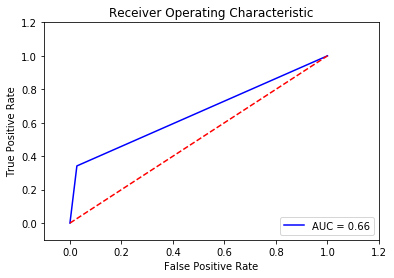

#############Evaluation Completed for  Logistic Regression  ###################


In [32]:
evaluate_logisticregression_performance(X_train,y_train,X_test,y_test)

### Naive Bayes

#############Evaluating the Performance of  Naive Bayes #############


Confusion Metrics:
[[10682  1287]
 [  716   879]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.94      0.89      0.91     11969
           1       0.41      0.55      0.47      1595

    accuracy                           0.85     13564
   macro avg       0.67      0.72      0.69     13564
weighted avg       0.87      0.85      0.86     13564

Evaluating the Cross Validation score
Mean Accuracy: 85.44884998849147
Standard Deviation: 0.25440323817138344


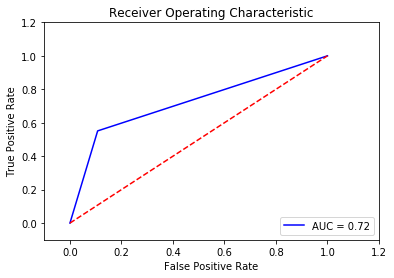

#############Evaluation Completed for  Naive Bayes  ###################


In [30]:
evaluate_naivebayes_performance(X_train,y_train,X_test,y_test)

### KNN

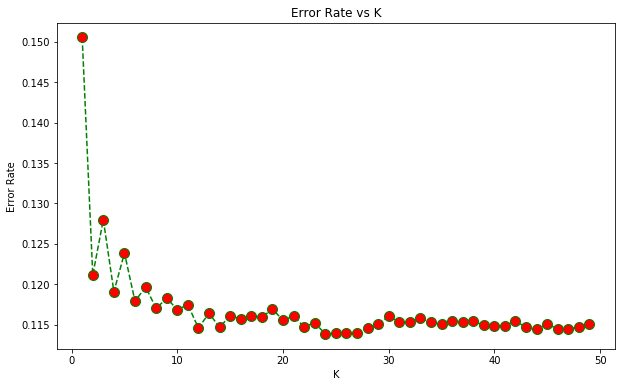

Optimal value of K is:  24
#############Evaluating the Performance of  KNN #############


Confusion Metrics:
[[11664   305]
 [ 1251   344]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     11969
           1       0.53      0.22      0.31      1595

    accuracy                           0.89     13564
   macro avg       0.72      0.60      0.62     13564
weighted avg       0.86      0.89      0.86     13564

Evaluating the Cross Validation score
Mean Accuracy: 88.9152257465583
Standard Deviation: 0.19260201094259427


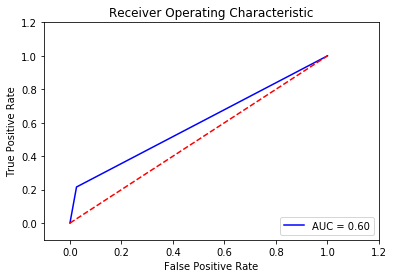

#############Evaluation Completed for  KNN  ###################


In [165]:
evaluate_knn_performance(X_train,y_train,X_test,y_test)

### SVM

In [ ]:
evaluate_svm_performance(X_train,y_train,X_test,y_test)

#############Evaluating the Performance of  SVM #############


Confusion Metrics:
[[11967     2]
 [ 1594     1]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     11969
           1       0.33      0.00      0.00      1595

    accuracy                           0.88     13564
   macro avg       0.61      0.50      0.47     13564
weighted avg       0.82      0.88      0.83     13564

Evaluating the Cross Validation score


### Adaboost

#############Evaluating the Performance of  AdaBoost #############


Confusion Metrics:
[[11075   894]
 [  802   793]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11969
           1       0.47      0.50      0.48      1595

    accuracy                           0.87     13564
   macro avg       0.70      0.71      0.71     13564
weighted avg       0.88      0.87      0.88     13564

Evaluating the Cross Validation score
Mean Accuracy: 87.52488407256104
Standard Deviation: 0.346374920638031


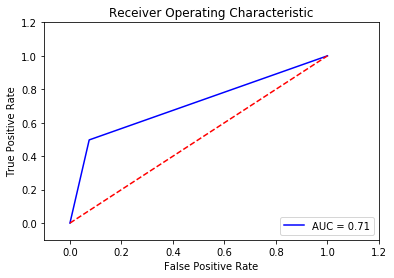

#############Evaluation Completed for  AdaBoost  ###################


In [14]:
evaluate_adaboost_performance(X_train,y_train,X_test,y_test)

### Gradient Boost

#############Evaluating the Performance of  GradientBoost #############


Confusion Metrics:
[[11936    33]
 [ 1466   129]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11969
           1       0.80      0.08      0.15      1595

    accuracy                           0.89     13564
   macro avg       0.84      0.54      0.54     13564
weighted avg       0.88      0.89      0.85     13564

Evaluating the Cross Validation score
Mean Accuracy: 89.08585434267317
Standard Deviation: 0.08890255780247283


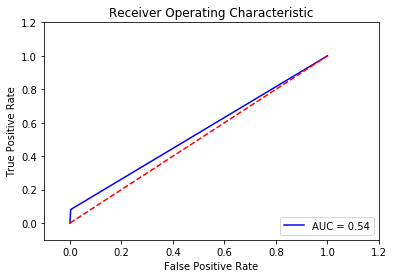

#############Evaluation Completed for  GradientBoost  ###################


In [17]:
evaluate_gradientboost_performance(X_train,y_train,X_test,y_test)

### Meta Bagging

#############Evaluating the Performance of  MetaBagging #############


Confusion Metrics:
[[11512   457]
 [  920   675]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     11969
           1       0.60      0.42      0.50      1595

    accuracy                           0.90     13564
   macro avg       0.76      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564

Evaluating the Cross Validation score
Mean Accuracy: 89.99275223933239
Standard Deviation: 0.1884317597816449


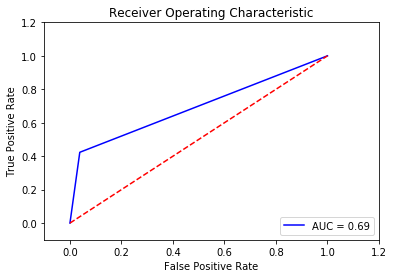

#############Evaluation Completed for  MetaBagging  ###################


In [18]:
evaluate_metabagging_performance(X_train,y_train,X_test,y_test)

### XgBoost

#############Evaluating the Performance of  XGBoost #############


Confusion Metrics:
[[11645   324]
 [  994   601]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.65      0.38      0.48      1595

    accuracy                           0.90     13564
   macro avg       0.79      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564

Evaluating the Cross Validation score
Mean Accuracy: 90.6247161938253
Standard Deviation: 0.2254962543960164


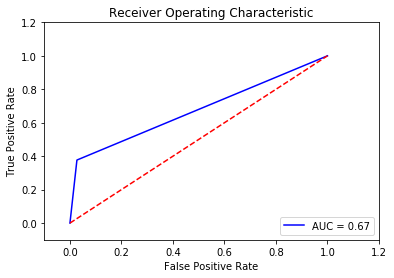

#############Evaluation Completed for  XGBoost  ###################


In [19]:
evaluate_xgboost_performance(X_train,y_train,X_test,y_test)

### Catboost

0:	learn: 0.5931843	total: 1.99s	remaining: 3m 17s
1:	learn: 0.5174499	total: 2.02s	remaining: 1m 38s
2:	learn: 0.4611101	total: 2.04s	remaining: 1m 5s
3:	learn: 0.4100857	total: 2.06s	remaining: 49.5s
4:	learn: 0.3700420	total: 2.09s	remaining: 39.7s
5:	learn: 0.3467465	total: 2.12s	remaining: 33.2s
6:	learn: 0.3291455	total: 2.15s	remaining: 28.5s
7:	learn: 0.3130603	total: 2.19s	remaining: 25.1s
8:	learn: 0.3033903	total: 2.22s	remaining: 22.4s
9:	learn: 0.2914482	total: 2.25s	remaining: 20.3s
10:	learn: 0.2811214	total: 2.28s	remaining: 18.5s
11:	learn: 0.2737294	total: 2.31s	remaining: 17s
12:	learn: 0.2693398	total: 2.35s	remaining: 15.7s
13:	learn: 0.2655520	total: 2.38s	remaining: 14.6s
14:	learn: 0.2629872	total: 2.41s	remaining: 13.6s
15:	learn: 0.2604667	total: 2.44s	remaining: 12.8s
16:	learn: 0.2572692	total: 2.47s	remaining: 12s
17:	learn: 0.2555340	total: 2.5s	remaining: 11.4s
18:	learn: 0.2524119	total: 2.53s	remaining: 10.8s
19:	learn: 0.2510690	total: 2.57s	remaining:

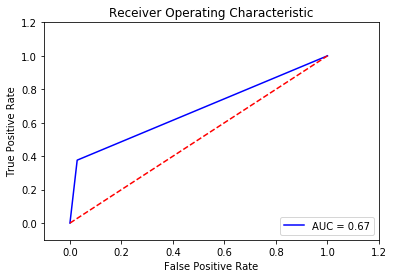

#############Evaluation Completed for  Catboost  ###################


In [20]:
evaluate_catboost_performance(X_train,y_train,X_test,y_test)

### Random Forest

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.7min finished


#############Evaluating the Performance of  RandomForest #############


Confusion Metrics:
[[11592   377]
 [  918   677]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11969
           1       0.64      0.42      0.51      1595

    accuracy                           0.90     13564
   macro avg       0.78      0.70      0.73     13564
weighted avg       0.89      0.90      0.90     13564

Evaluating the Cross Validation score
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.1min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 33.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.2min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.3min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.2min finished


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.2min finished


Mean Accuracy: 90.56151754993358
Standard Deviation: 0.39926703608510916


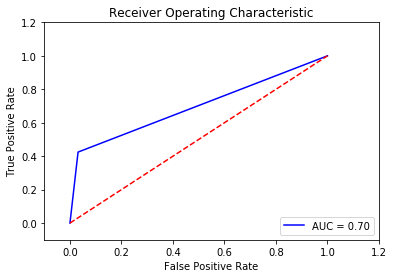

#############Evaluation Completed for  RandomForest  ###################


In [25]:
evaluate_randomforest_performance(X_train,y_train,X_test,y_test)

### Extra Tree Classifier

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(n_estimators=700,criterion= 'entropy',min_samples_split= 5,
                            max_depth= 50, min_samples_leaf= 5) 

In [15]:
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

from sklearn.model_selection import cross_val_score 

accuracies_et= cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10) 
accuracies_et_mean=accuracies_et.mean()*100
print("Mean Accuracy:Extra Trees=",accuracies_et)

accuracies_et_std=accuracies_et.std()*100
print("Standard Deviation:Extra Trees=",accuracies_et_std)

[[11821   148]
 [ 1267   328]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11969
           1       0.69      0.21      0.32      1595

    accuracy                           0.90     13564
   macro avg       0.80      0.60      0.63     13564
weighted avg       0.88      0.90      0.87     13564

Mean Accuracy:Extra Trees= [0.89260897 0.89734681 0.89829438 0.89636651 0.90107459 0.90139064
 0.89475348 0.9073957  0.89696587 0.89412137]
Standard Deviation:Extra Trees= 0.4100202579555125


In [16]:
classifier.feature_importances_

array([0.02290811, 0.00999544, 0.03219265, 0.27873128, 0.01467259,
       0.01212705, 0.00505797, 0.00728104, 0.00966294, 0.00295149,
       0.00252915, 0.00872873, 0.00838452, 0.00360238, 0.00580251,
       0.00508864, 0.0092307 , 0.00343805, 0.00051473, 0.00598416,
       0.01189826, 0.01000762, 0.00699258, 0.0104967 , 0.01034086,
       0.00359763, 0.00110975, 0.00112305, 0.02847346, 0.02733137,
       0.00912257, 0.00981252, 0.02696187, 0.00505974, 0.04335038,
       0.02097363, 0.01782361, 0.00418702, 0.00866011, 0.00658763,
       0.01436715, 0.01677841, 0.02397416, 0.01658917, 0.00999467,
       0.01713348, 0.01621791, 0.01428805, 0.00697986, 0.11499969,
       0.03588295])

In [17]:
df1= pd.DataFrame()
#df1['feature'] = df.drop(['not.fully.paid'], axis=1).columns
df1['feature'] = X.columns
df1['Importance Index']= classifier.feature_importances_
print(df1.sort_values(by='Importance Index', ascending=False))

                feature  Importance Index
3              duration          0.278731
49     poutcome_success          0.115000
34      contact_unknown          0.043350
50     poutcome_unknown          0.035883
2                   day          0.032193
28           housing_no          0.028473
29          housing_yes          0.027331
32     contact_cellular          0.026962
42            month_mar          0.023974
0                   age          0.022908
35            month_apr          0.020974
36            month_aug          0.017824
45            month_oct          0.017133
41            month_jun          0.016778
43            month_may          0.016589
46            month_sep          0.016218
4              campaign          0.014673
40            month_jul          0.014367
47     poutcome_failure          0.014288
5                 pdays          0.012127
20      marital_married          0.011898
23  education_secondary          0.010497
24   education_tertiary          0

### Hyperparameter tuning

In [33]:
hyperparams.random_forest

{'n_estimators': [50, 87, 125, 162, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 12, 15, 17, 20, None],
 'min_samples_split': [2, 5, 10, 15],
 'min_samples_leaf': [1, 2, 4, 10],
 'bootstrap': [True, False]}

In [34]:
model = RandomizedSearchCV(estimator = RandomForestClassifier(n_estimators=25), param_distributions = hyperparams.random_forest, n_iter = 100, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)    
model.fit(X_train,y_train)

print(model.best_estimator_)

best_rf = model.best_estimator_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.6min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=87,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [35]:
best_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=87,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Random forest and Feature selection

In [36]:
from sklearn.feature_selection import SelectFromModel

df1= pd.DataFrame()
#df1['feature'] = df.drop(['not.fully.paid'], axis=1).columns
df1['feature'] = X.columns
df1['Importance Index']= best_rf.feature_importances_
print(df1.sort_values(by='Importance Index', ascending=False))


                feature  Importance Index
3              duration          0.317140
0                   age          0.079251
1               balance          0.075020
49     poutcome_success          0.074802
2                   day          0.066617
5                 pdays          0.040315
4              campaign          0.029361
6              previous          0.019638
42            month_mar          0.016808
28           housing_no          0.016109
29          housing_yes          0.016060
35            month_apr          0.013915
45            month_oct          0.011141
32     contact_cellular          0.010714
34      contact_unknown          0.010454
41            month_jun          0.010276
24   education_tertiary          0.009788
23  education_secondary          0.009438
20      marital_married          0.009388
46            month_sep          0.009256
47     poutcome_failure          0.009098
43            month_may          0.009002
50     poutcome_unknown          0

In [37]:
sfm = SelectFromModel(best_rf, threshold=0.01)
sfm.fit(X_train, y_train)
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])


age
balance
day
duration
campaign
pdays
previous
housing_no
housing_yes
contact_cellular
contact_unknown
month_apr
month_jun
month_mar
month_oct
month_sep
poutcome_failure
poutcome_success


In [38]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

#############Evaluating the Performance of  Random Forest - Feature selection #############


Confusion Metrics:
[[11525   444]
 [  890   705]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11969
           1       0.61      0.44      0.51      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.70      0.73     13564
weighted avg       0.89      0.90      0.89     13564

Evaluating the Cross Validation score
Mean Accuracy: 90.29607077063332
Standard Deviation: 0.3426655731324606


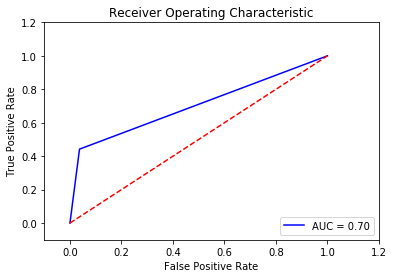

#############Evaluation Completed for  Random Forest - Feature selection  ###################


In [39]:
best_rf.fit(X_important_train,y_train)

train_model("Random Forest - Feature selection", best_rf, X_important_train, X_important_test, y_train, y_test)

### Stacking

In [40]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
pred_val_xgb=xgb.predict(X_train)
test_pred_xgb=xgb.predict(X_test)


adaboost = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 3, learning_rate = 0.001)
adaboost.fit(X_train,y_train)
pred_val_adaboost=adaboost.predict(X_train)
test_pred_adaboost=adaboost.predict(X_test)


gradboost = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gradboost.fit(X_train,y_train)
pred_val_gradboost=gradboost.predict(X_train)
test_pred_gradboost=gradboost.predict(X_test)

catboost = CatBoostClassifier(iterations=100, depth=3, learning_rate=0.1, loss_function='Logloss')
catboost.fit(X_train,y_train)
pred_val_catboost=catboost.predict(X_train)
test_pred_catboost=catboost.predict(X_test)


d_train = lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt' ## gradient boosting
params['objective'] = 'binary' ## since its a classification problem
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)


pred_val_lightgbm=clf.predict(X_train)

#convert into binary values
for i in range(0, 31647):
    if pred_val_lightgbm[i]>=0.5:
        pred_val_lightgbm[i]=1
    else:  
        pred_val_lightgbm[i]=0
    

test_pred_lightgbm=clf.predict(X_test)


for i in range(0, 13564):
    if test_pred_lightgbm[i]>=0.5:
        test_pred_lightgbm[i]=1
    else:  
        test_pred_lightgbm[i]=0
        
best_rf.fit(X_train,y_train) 
pred_val_rf=best_rf.predict(X_train)
test_pred_rf=best_rf.predict(X_test)



lr = LogisticRegression()
stacked_predictions=np.column_stack((pred_val_rf,pred_val_xgb,pred_val_adaboost,pred_val_gradboost,pred_val_catboost, pred_val_lightgbm))

#stacked_predictions[0:10]
stacked_test_predictions=np.column_stack((test_pred_rf,test_pred_xgb,test_pred_adaboost,test_pred_gradboost,test_pred_catboost, test_pred_lightgbm))
#stacked_test_predictions[0:10]

## Building Meta Model
lr.fit(stacked_predictions,y_train)

y_pred=lr.predict(stacked_test_predictions)
y_pred


from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred)) 

accuracies_lr= cross_val_score(estimator = lr, X = stacked_predictions, y = y_train, cv = 10) 
accuracies_lr_mean=accuracies_lr.mean()*100
print("Accuracy Stacking=",accuracies_lr_mean)

accuracies_lr_std=accuracies_lr_mean.std()*100
print("Standard Deviation lr=",accuracies_lr_std)

0:	learn: 0.5931843	total: 77.7ms	remaining: 7.69s
1:	learn: 0.5174499	total: 93.3ms	remaining: 4.57s
2:	learn: 0.4611101	total: 109ms	remaining: 3.53s
3:	learn: 0.4100857	total: 131ms	remaining: 3.14s
4:	learn: 0.3700420	total: 148ms	remaining: 2.81s
5:	learn: 0.3467465	total: 168ms	remaining: 2.63s
6:	learn: 0.3291455	total: 185ms	remaining: 2.45s
7:	learn: 0.3130603	total: 202ms	remaining: 2.32s
8:	learn: 0.3033903	total: 220ms	remaining: 2.22s
9:	learn: 0.2914482	total: 245ms	remaining: 2.21s
10:	learn: 0.2811214	total: 263ms	remaining: 2.13s
11:	learn: 0.2737294	total: 288ms	remaining: 2.11s
12:	learn: 0.2693398	total: 306ms	remaining: 2.05s
13:	learn: 0.2655520	total: 335ms	remaining: 2.06s
14:	learn: 0.2629872	total: 356ms	remaining: 2.02s
15:	learn: 0.2604667	total: 384ms	remaining: 2.02s
16:	learn: 0.2572692	total: 426ms	remaining: 2.08s
17:	learn: 0.2555340	total: 450ms	remaining: 2.05s
18:	learn: 0.2524119	total: 471ms	remaining: 2.01s
19:	learn: 0.2510690	total: 492ms	remai

### Blending

In [41]:
blended_predictions = np.column_stack((X_train,stacked_predictions))
blended_test_predictions=np.column_stack((X_test,stacked_test_predictions))


blended_predictions=pd.DataFrame(blended_predictions)
blended_test_predictions=pd.DataFrame(blended_test_predictions)

lr = LogisticRegression()
lr.fit(blended_predictions,y_train)

y_pred=lr.predict(blended_test_predictions)
y_pred

from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))  

[[11072   897]
 [  801   794]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11969
           1       0.47      0.50      0.48      1595

    accuracy                           0.87     13564
   macro avg       0.70      0.71      0.71     13564
weighted avg       0.88      0.87      0.88     13564



## Re-train the models after feature selection

In [42]:
X_train=X_important_train
X_test = X_important_test

In [43]:
X_train.shape

(31647, 18)

In [44]:
X_test.shape

(13564, 18)

#############Evaluating the Performance of  AdaBoost #############


Confusion Metrics:
[[10976   993]
 [  845   750]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     11969
           1       0.43      0.47      0.45      1595

    accuracy                           0.86     13564
   macro avg       0.68      0.69      0.69     13564
weighted avg       0.87      0.86      0.87     13564

Evaluating the Cross Validation score
Mean Accuracy: 87.04771946781236
Standard Deviation: 0.4757320917480547


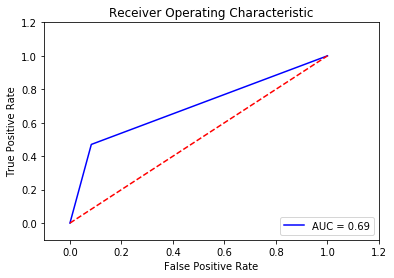

#############Evaluation Completed for  AdaBoost  ###################


In [45]:
evaluate_adaboost_performance(X_train,y_train, X_test, y_test)

#############Evaluating the Performance of  GradientBoost #############


Confusion Metrics:
[[11936    33]
 [ 1465   130]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11969
           1       0.80      0.08      0.15      1595

    accuracy                           0.89     13564
   macro avg       0.84      0.54      0.54     13564
weighted avg       0.88      0.89      0.85     13564

Evaluating the Cross Validation score
Mean Accuracy: 89.1079682508343
Standard Deviation: 0.08207604060897605


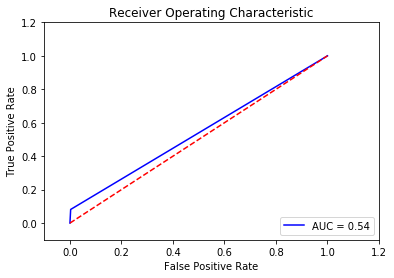

#############Evaluation Completed for  GradientBoost  ###################


In [46]:
evaluate_gradientboost_performance(X_train,y_train, X_test, y_test)

#############Evaluating the Performance of  MetaBagging #############


Confusion Metrics:
[[11508   461]
 [  957   638]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11969
           1       0.58      0.40      0.47      1595

    accuracy                           0.90     13564
   macro avg       0.75      0.68      0.71     13564
weighted avg       0.88      0.90      0.89     13564

Evaluating the Cross Validation score
Mean Accuracy: 89.91689139785845
Standard Deviation: 0.365298374948432


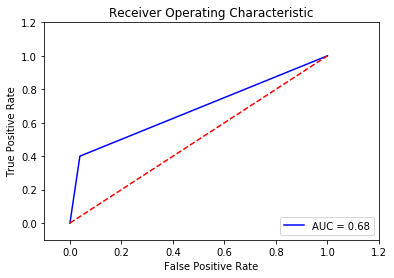

#############Evaluation Completed for  MetaBagging  ###################


In [47]:
evaluate_metabagging_performance(X_train,y_train, X_test, y_test)

#############Evaluating the Performance of  XGBoost #############


Confusion Metrics:
[[11635   334]
 [  994   601]]


Model Performance Summary:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11969
           1       0.64      0.38      0.48      1595

    accuracy                           0.90     13564
   macro avg       0.78      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564

Evaluating the Cross Validation score
Mean Accuracy: 90.64683609340449
Standard Deviation: 0.2564060488110066


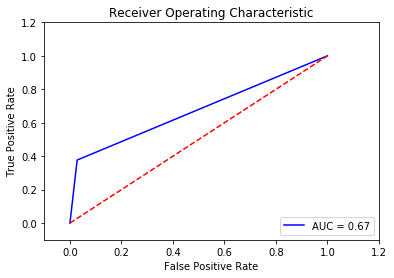

#############Evaluation Completed for  XGBoost  ###################


In [48]:
evaluate_xgboost_performance(X_train,y_train, X_test, y_test)

0:	learn: 0.6278464	total: 14.1ms	remaining: 1.4s
1:	learn: 0.5762781	total: 25.7ms	remaining: 1.26s
2:	learn: 0.5321703	total: 42.8ms	remaining: 1.39s
3:	learn: 0.4951053	total: 53.1ms	remaining: 1.27s
4:	learn: 0.4641812	total: 63.8ms	remaining: 1.21s
5:	learn: 0.4364285	total: 76.2ms	remaining: 1.19s
6:	learn: 0.4129133	total: 87.5ms	remaining: 1.16s
7:	learn: 0.3936085	total: 99.2ms	remaining: 1.14s
8:	learn: 0.3765002	total: 110ms	remaining: 1.11s
9:	learn: 0.3617049	total: 120ms	remaining: 1.08s
10:	learn: 0.3484811	total: 130ms	remaining: 1.05s
11:	learn: 0.3366003	total: 140ms	remaining: 1.03s
12:	learn: 0.3259897	total: 150ms	remaining: 1.01s
13:	learn: 0.3167076	total: 160ms	remaining: 985ms
14:	learn: 0.3088651	total: 170ms	remaining: 966ms
15:	learn: 0.3021844	total: 181ms	remaining: 948ms
16:	learn: 0.2955821	total: 191ms	remaining: 931ms
17:	learn: 0.2899590	total: 202ms	remaining: 919ms
18:	learn: 0.2849289	total: 213ms	remaining: 909ms
19:	learn: 0.2800112	total: 224ms	

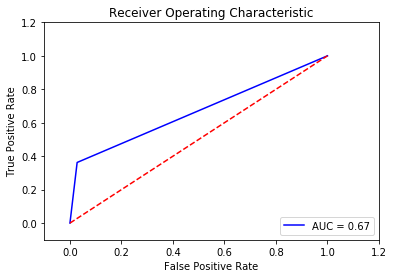

#############Evaluation Completed for  Catboost  ###################


In [49]:
evaluate_catboost_performance(X_train,y_train, X_test, y_test)

# Summary

### Technical Summary

**RandomForestClassifier performed well against this dataset. Hyperparameter tuning was performed and optimal number of Estimators are 87**

**The prediction is having 95% accuracy and with 65% precision for predicting users who will accept the term deposit offer**

### Non-technical summary

**95% of the users who have subscribed term deposit have positive balance**

**The users who were contacted in between 8th and 15th day of month showed interest for the term deposit**

**When the customer is being contacted, if the call lasts long, the chance of accepting the offer is higher**

**75% of the customers who showed interest in Term Deposit were contacted once or twice during the campaign**

**customers(from all job classes) who subscribed Term Deposit were contacted previousily before this campaign**